In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Heart_disease_statlog.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3,0
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0


In [3]:
df.shape

(270, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df = df.astype(float)

In [7]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
array = df.values
x = np.array(array[:, 0:12], dtype = np.float64)
y = np.asarray(array[:, 12])

In [11]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_x = scaler.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.25, random_state = 42)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
model = Sequential()
model.add(Dense(16, input_dim = 12, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
optimizer = Adam(learning_rate = 0.001)
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizer, 
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [18]:
label = df['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, label, test_size = 0.2, random_state = 42)

In [19]:
x = df.iloc[:, 0:12].values
y = df["target"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
y_test

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.])

In [20]:
ckpt_model = 'Heart_disease_statlog-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model,
                            monitor = 'val_acc',
                            verbose = 1,
                            save_best_only = True,
                            mode = 'max')
early_stopping = EarlyStopping(patience = 10, 
                               monitor = 'val_loss', 
                               restore_best_weights = True)
callbacks_list = [checkpoint, early_stopping]

In [21]:
print('Starting training...')

history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs = 150,
                    batch_size = 16,
                    callbacks = callbacks_list,
                    verbose = 0)

Starting training...


In [22]:
model.fit(x, 
          y, 
          epochs = 1000, 
          batch_size = 70)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8000
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8037
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.7963
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.7963
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8037
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8037
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8000
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.7963
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8037
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8000
Epoch 11/1000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8111
Epoch 84/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8148
Epoch 85/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8148
Epoch 86/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8148
Epoch 87/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8148
Epoch 88/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8111
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8111
Epoch 90/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.8037
Epoch 91/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8074
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8148
Epoch 93/1000
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.3782 - accuracy: 0.8259
Epoch 166/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8222
Epoch 167/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8148
Epoch 168/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8222
Epoch 169/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8185
Epoch 170/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8185
Epoch 171/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8296
Epoch 172/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8222
Epoch 173/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8185
Epoch 174/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8185
Epoch 175/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8333
Epoch 248/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8148
Epoch 249/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8296
Epoch 250/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8370
Epoch 251/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8296
Epoch 252/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8259
Epoch 253/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8333
Epoch 254/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8333
Epoch 255/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8370
Epoch 256/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8222
Epoch 257/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8370
Epoch 330/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8296
Epoch 331/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8370
Epoch 332/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8296
Epoch 333/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8333
Epoch 334/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8296
Epoch 335/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8333
Epoch 336/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8370
Epoch 337/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8444
Epoch 338/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8370
Epoch 339/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8407
Epoch 412/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8444
Epoch 413/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8407
Epoch 414/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.8407
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8296
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8370
Epoch 417/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8370
Epoch 418/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8407
Epoch 419/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8296
Epoch 420/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8370
Epoch 421/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8407
Epoch 494/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8333
Epoch 495/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8407
Epoch 496/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8370
Epoch 497/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8444
Epoch 498/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8370
Epoch 499/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8333
Epoch 500/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8444
Epoch 501/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8370
Epoch 502/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8444
Epoch 503/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8407
Epoch 576/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8444
Epoch 577/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8444
Epoch 578/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8370
Epoch 579/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8111
Epoch 580/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8333
Epoch 581/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8630
Epoch 582/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8296
Epoch 583/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8481
Epoch 584/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8407
Epoch 585/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8370
Epoch 658/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8481
Epoch 659/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8407
Epoch 660/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8333
Epoch 661/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8259
Epoch 662/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8481
Epoch 663/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8481
Epoch 664/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8407
Epoch 665/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8444
Epoch 666/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8370
Epoch 667/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8444
Epoch 740/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8556
Epoch 741/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8444
Epoch 742/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8481
Epoch 743/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8444
Epoch 744/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8370
Epoch 745/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8481
Epoch 746/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8444
Epoch 747/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8481
Epoch 748/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8519
Epoch 749/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8519
Epoch 822/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8370
Epoch 823/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8556
Epoch 824/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8519
Epoch 825/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8407
Epoch 826/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8407
Epoch 827/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8481
Epoch 828/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8333
Epoch 829/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8519
Epoch 830/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8593
Epoch 831/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8333
Epoch 904/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8407
Epoch 905/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8407
Epoch 906/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8519
Epoch 907/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8370
Epoch 908/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8444
Epoch 909/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8444
Epoch 910/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8370
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8407
Epoch 912/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8407
Epoch 913/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8444
Epoch 986/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8519
Epoch 987/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8407
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8556
Epoch 989/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8407
Epoch 990/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8556
Epoch 991/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8370
Epoch 992/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8481
Epoch 993/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8407
Epoch 994/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8296
Epoch 995/1000


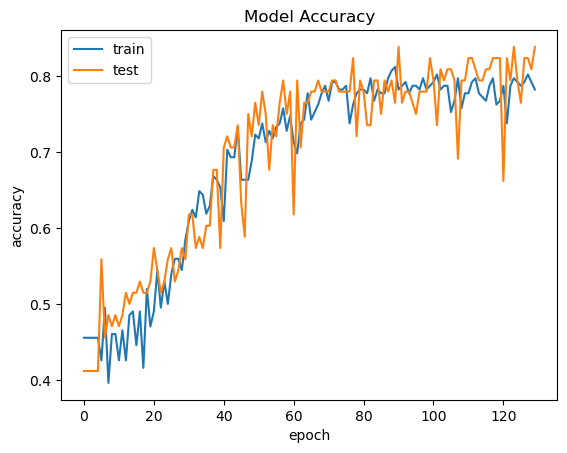

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

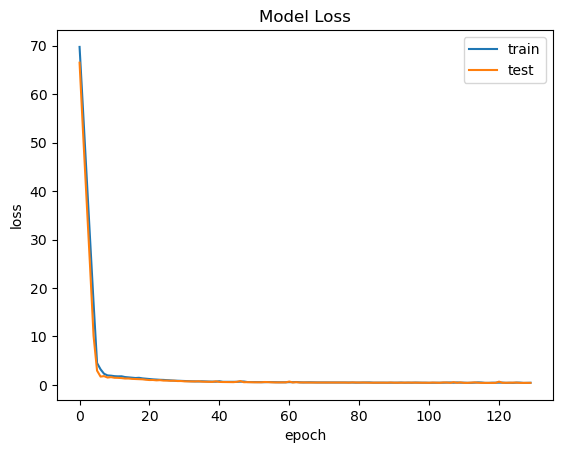

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [25]:
scores = model.evaluate(x_test, y_test, verbose = 0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

accuracy: 86.76%
